# MagnaProbe Data Vis

## File Converting

#### Startup + Loading Libraries

In [2]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import utm

/var/folders/4c/x6hv5l7x3_98_kld282jl4v00000gn/T/ipykernel_19647/70165386.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Batch Conversion

In [59]:
input_dir = '/Users/maia/GM2024/Depths/MP_TXT'
output_dir = '/Users/maia/GM2024/Depths/MP_CSV'

# column headers --> for all but GGA data, must be processed sep, see data jail
column_headers = [
    "TIMESTAMP", "RECORD", "Counter", "DepthCm", "BattVolts", "latitude_a", "latitude_b",
    "Longitude_a", "Longitude_b", "fix_quality", "nmbr_satellites", "HDOP", "altitudeB",
    "DepthVolts", "LatitudeDDDDD", "LongitudeDDDDD", "month", "dayofmonth", "hourofday",
    "minutes", "seconds", "microseconds"
]

for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
        input_file = os.path.join(input_dir, filename)
        output_file = os.path.join(output_dir, filename[:-4] + ".csv")  # Change extension to .csv
        
        with open(input_file, 'r') as txtfile:
            data = txtfile.readlines()
        delimiter = ','  

        # Write the content into a .csv file
        with open(output_file, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(column_headers)
            for row in data[4:]:
                writer.writerow(row.strip().split(delimiter))

### Single File Conversion (aka Data Jail)

In [12]:
input_file = '/Users/maia/GM2024/Depths/Data_Jail/TXT/WENO3-5_20240131_Magnaprobe.txt'
output_file = '/Users/maia/GM2024/Depths/Data_Jail/CSV/WENO3-5_20240131_Magnaprobe.csv'

# Define the column headers
column_headers = ["Timestamp", "Record", "Counter", "Depth (cm)", "Battery Volts", "GGA N/S Indicator", 
          "GGA Latitude", "GGA E/W Indicator", "GGA Longitude", "GGA Position Fix", 
          "GGA Number of Satellites", "GGA HDOP", "GGA Altitude", "Depth Volts", "Month", 
          "Day of Month", "Hour of Day", "Minutes", "Seconds", "Microseconds", "RM Cut C", 
          "RM Cut C Date", "GGA String", "RMC String"]

with open(input_file, 'r') as txtfile:
    data = txtfile.readlines()
delimiter = ','  

# Write the content into a .csv file
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(column_headers)
    for row in data[4:]:
        writer.writerow(row.strip().split(delimiter)) 

## This file is still having issues. need to resolve difference in formatting/ saving of this magnaprobe


## Plots of Depth Distribution 

### Single Plot

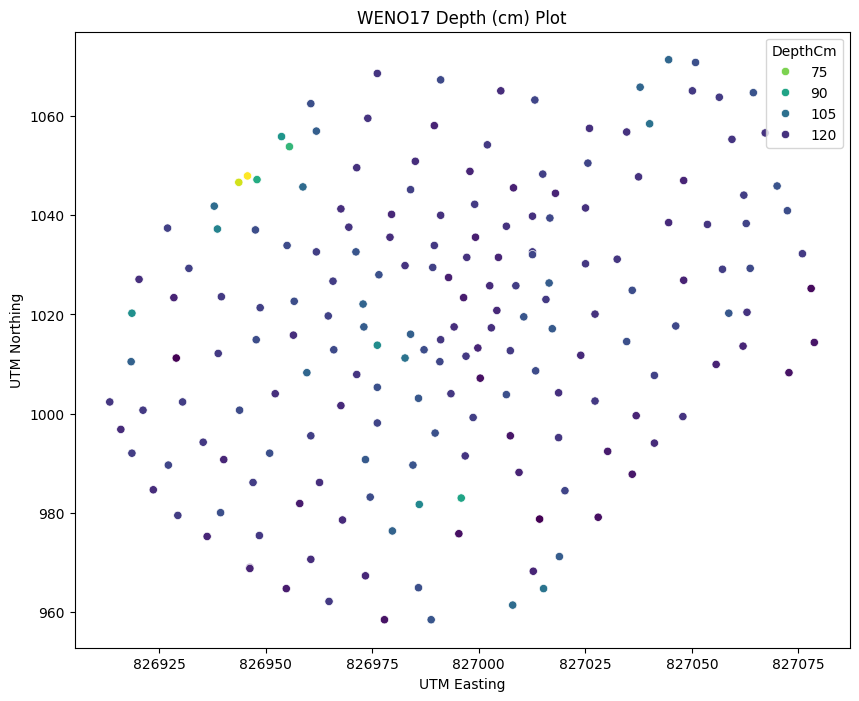

In [5]:
df = pd.read_csv('/Users/maia/GM2024/Depths/MP_CSV/WENO17_20240129_Maganprobe.csv')

# Filter depths between 1 and 130 centimeters
filtered_df = df[(df['DepthCm'] >= 1) & (df['DepthCm'] <= 130)]

# Convert latitude and longitude to UTM coordinates
utm_coords = filtered_df.apply(lambda row: utm.from_latlon(row['LatitudeDDDDD'], row['LongitudeDDDDD']), axis=1)
filtered_df['UTM_Easting'] = [coord[0] for coord in utm_coords]
filtered_df['UTM_Northing'] = [coord[1] for coord in utm_coords]

# Plot DepthCm against UTM coordinates with color gradient
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='UTM_Easting', y='UTM_Northing', hue='DepthCm', palette='viridis_r', data=filtered_df)
plt.title('WENO17 Depth (cm) Plot')
plt.xlabel('UTM Easting')
plt.ylabel('UTM Northing')

save_dir = '/Users/maia/GM2024/Depths/MP_Plots'

# Save the plot as png
plt.savefig(os.path.join(save_dir, 'WENO17_20240129_Maganprobe_UTM.png'))

plt.show()


### Batch Plot

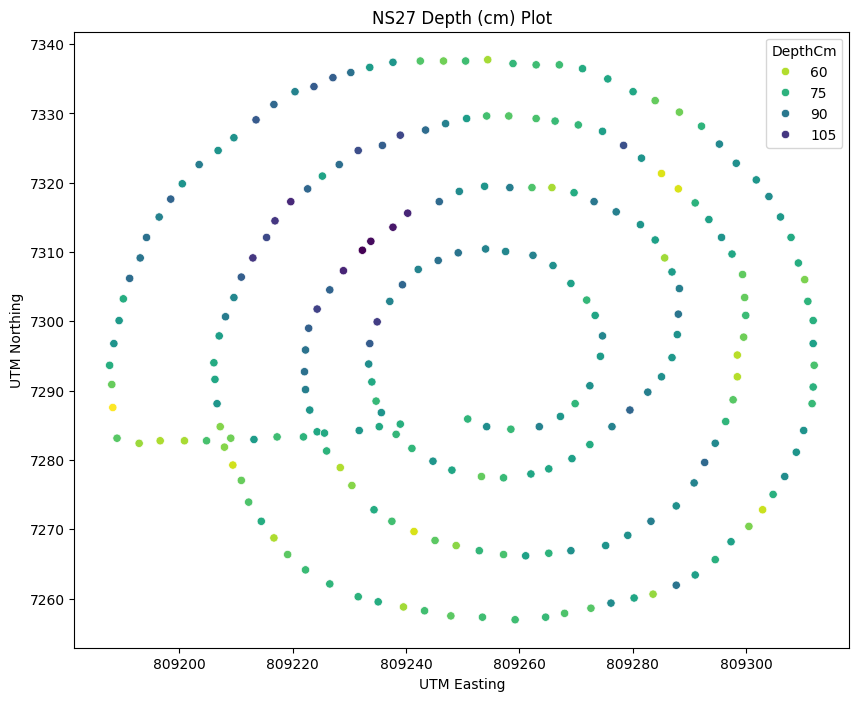

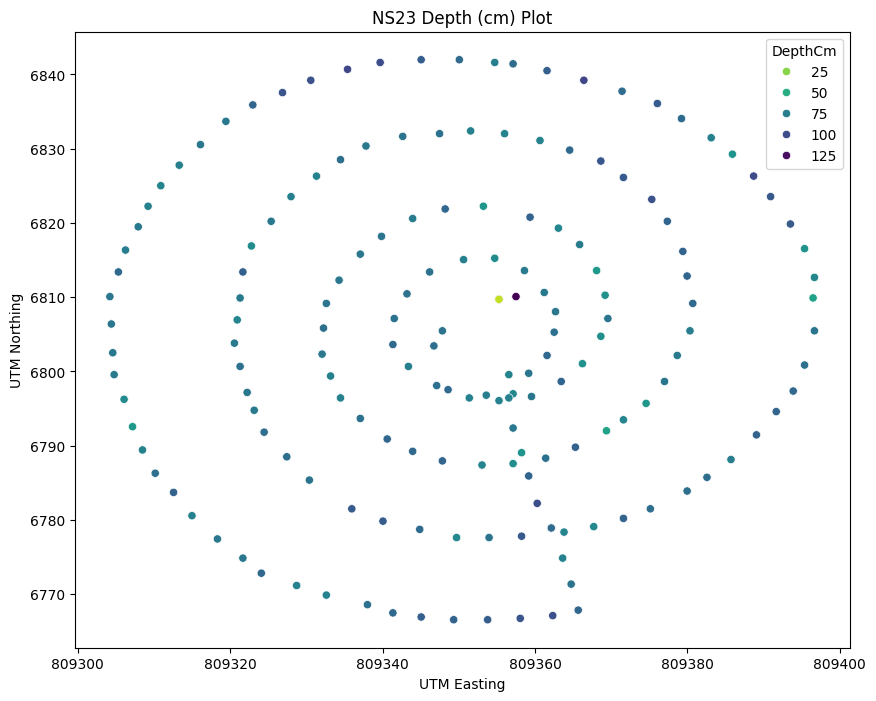

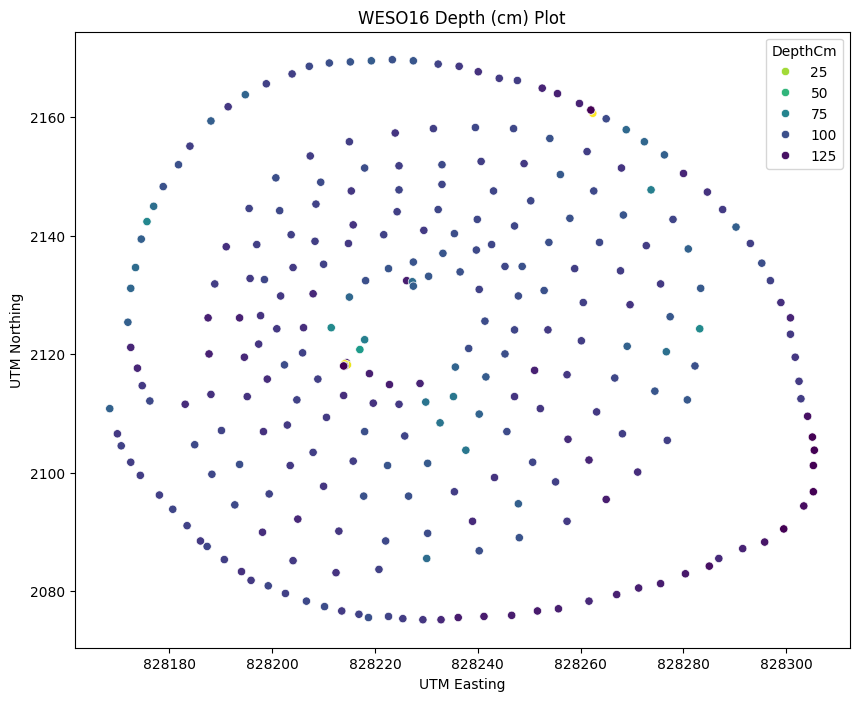

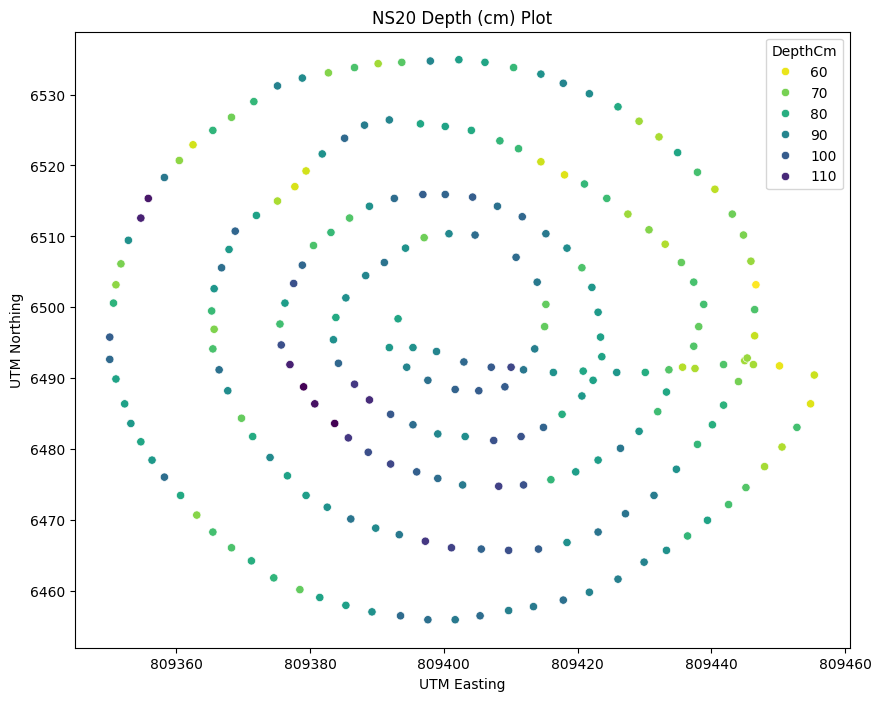

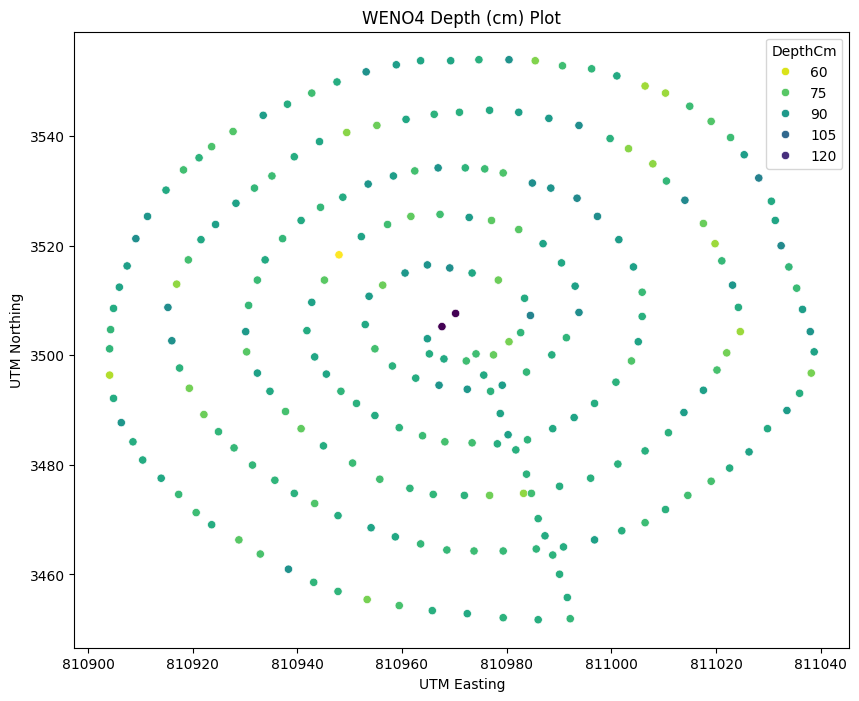

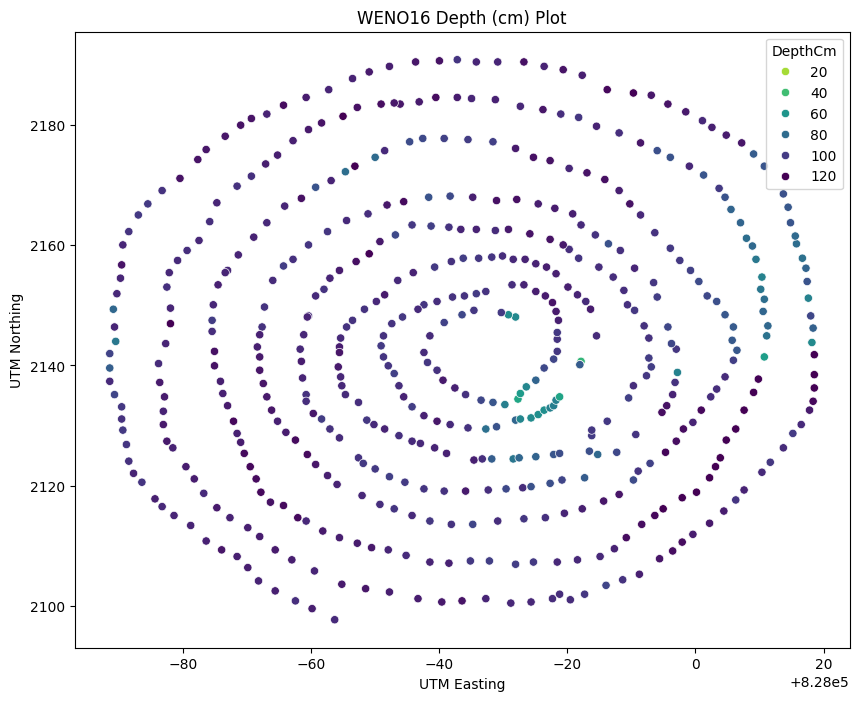

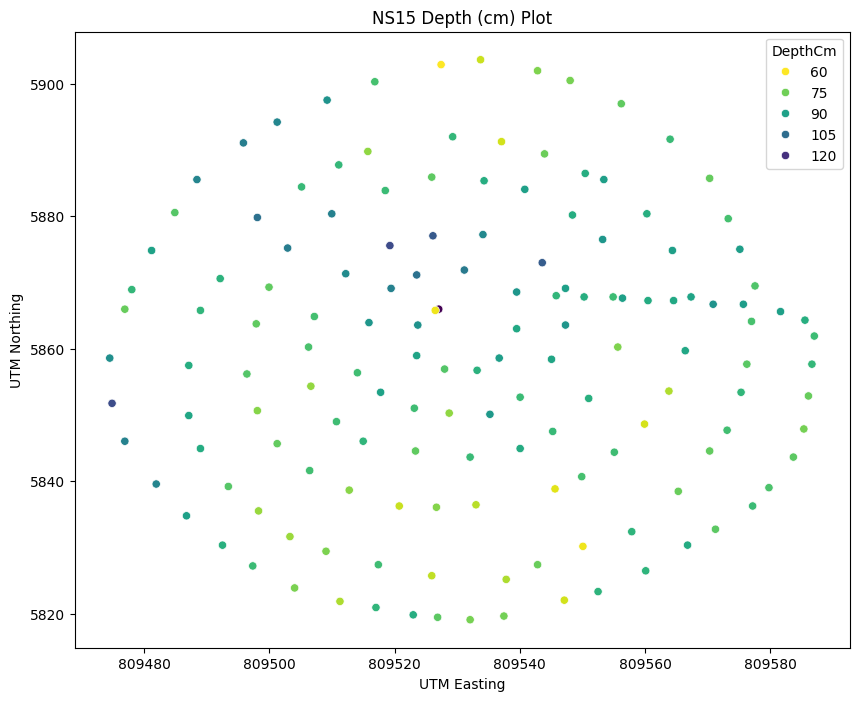

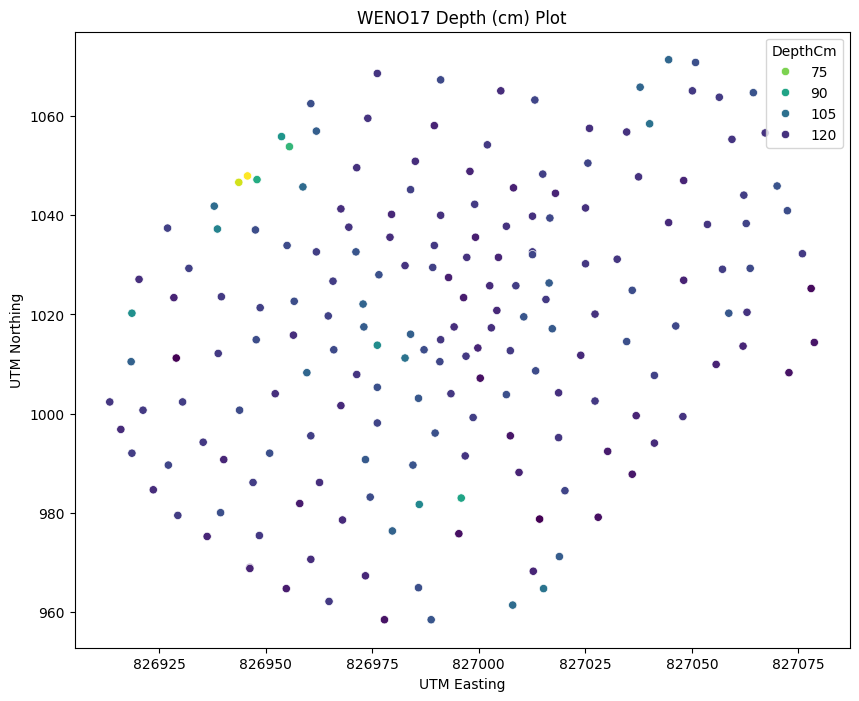

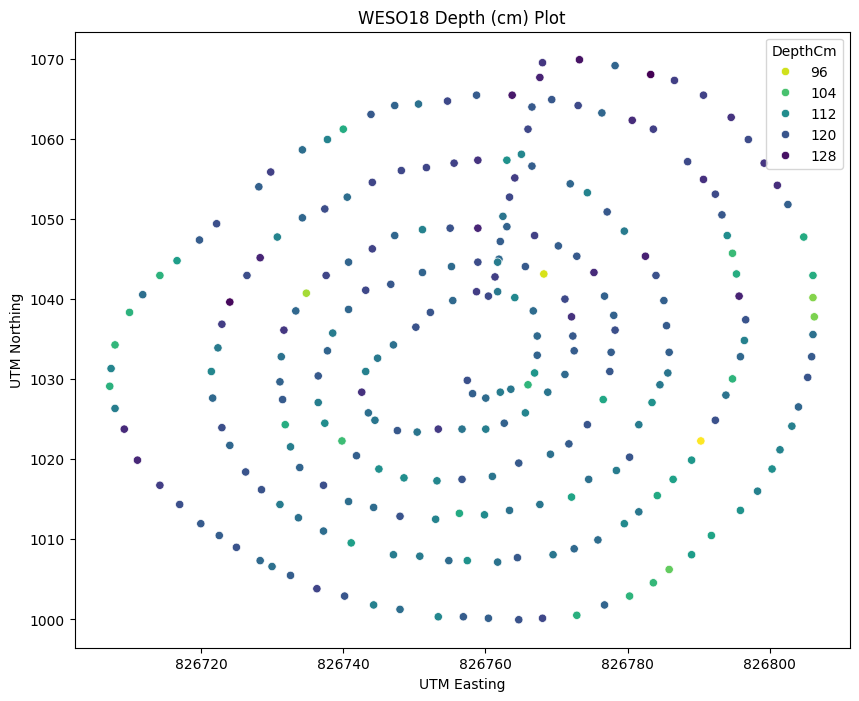

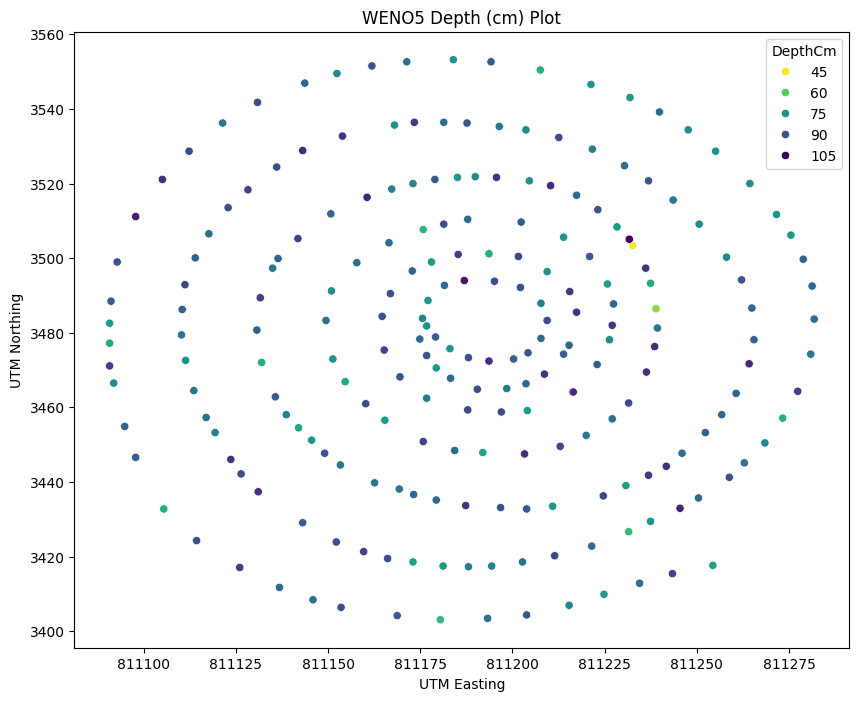

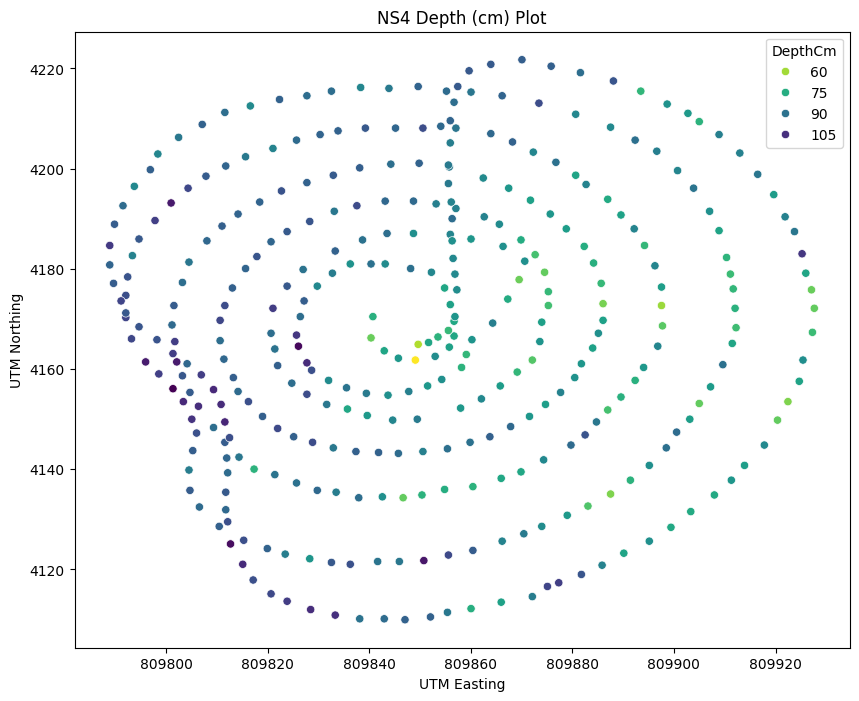

In [6]:
input_dir = '/Users/maia/GM2024/Depths/MP_CSV'
output_dir = '/Users/maia/GM2024/Depths/MP_Plots'

# Iterate over each .csv file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_dir, filename))

        # Convert latitude and longitude to UTM coordinates
        utm_coords = df.apply(lambda row: utm.from_latlon(row['LatitudeDDDDD'], row['LongitudeDDDDD']), axis=1)
        df['UTM_Easting'] = [coord[0] for coord in utm_coords]
        df['UTM_Northing'] = [coord[1] for coord in utm_coords]
     
        # Remove points that are <1 cm >130
        filtered_df = df[(df['DepthCm'] >= 1) & (df['DepthCm'] <= 130)]
       
        # Plot DepthCm against UTM coordinates with color gradient
        plt.figure(figsize=(10, 8))
        scatter = sns.scatterplot(x='UTM_Easting', y='UTM_Northing', hue='DepthCm', palette='viridis_r', data=filtered_df)
        plt.title(f'{filename[:-24]} Depth (cm) Plot')  # Remove the extension from filename for title
        plt.xlabel('UTM Easting')
        plt.ylabel('UTM Northing')

        # Create the directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)

        # Save the plot as an image file (PNG) with the desired filename and path
        plt.savefig(os.path.join(output_dir, f'{filename[:-4]}_UTM.png'))  # Remove the extension from filename for saved filename
        
        plt.show()


### All Together Now

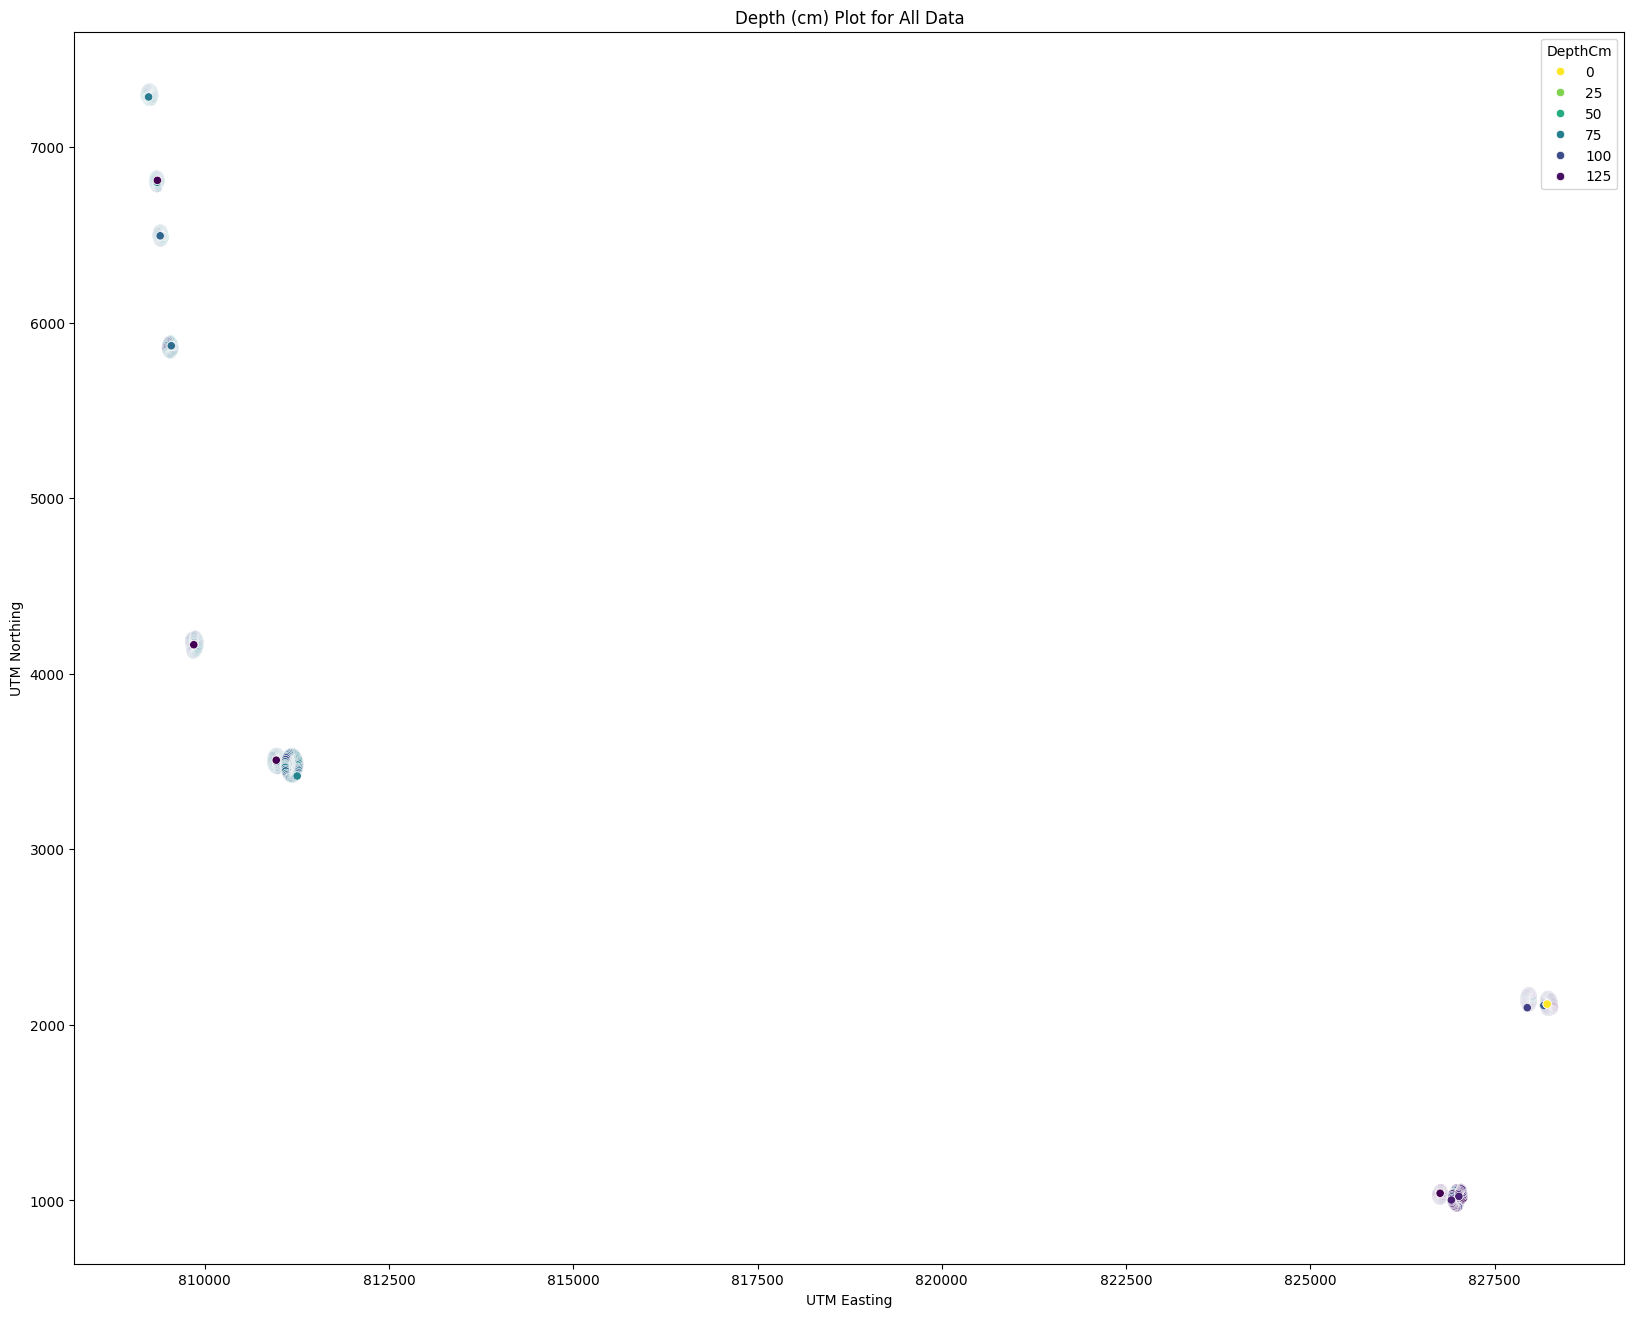

In [8]:
input_dir = '/Users/maia/GM2024/Depths/MP_CSV'
output_dir = '/Users/maia/GM2024/Depths/MP_Plots'

all_data = pd.DataFrame()

# Iterate over each .csv file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_dir, filename))

        # Filter depths between 1 and 130 centimeters
        df = df[(df['DepthCm'] >= 1) & (df['DepthCm'] <= 130)]

        # Convert latitude and longitude to UTM coordinates
        utm_coords = df.apply(lambda row: utm.from_latlon(row['LatitudeDDDDD'], row['LongitudeDDDDD']), axis=1)
        df['UTM_Easting'] = [coord[0] for coord in utm_coords]
        df['UTM_Northing'] = [coord[1] for coord in utm_coords]

        all_data = pd.concat([all_data, df], ignore_index=True)

# Plot DepthCm against UTM coordinates with color gradient for all filtered data
plt.figure(figsize=(20, 16))
scatter = sns.scatterplot(x='UTM_Easting', y='UTM_Northing', hue='DepthCm', palette='viridis_r', data=all_data)
plt.title('Depth (cm) Plot for Filtered Data')
plt.xlabel('UTM Easting')
plt.ylabel('UTM Northing')

plt.savefig(os.path.join(output_dir, 'filtered_data_UTM.png'))

plt.show()


### Plot of Avg Depths 

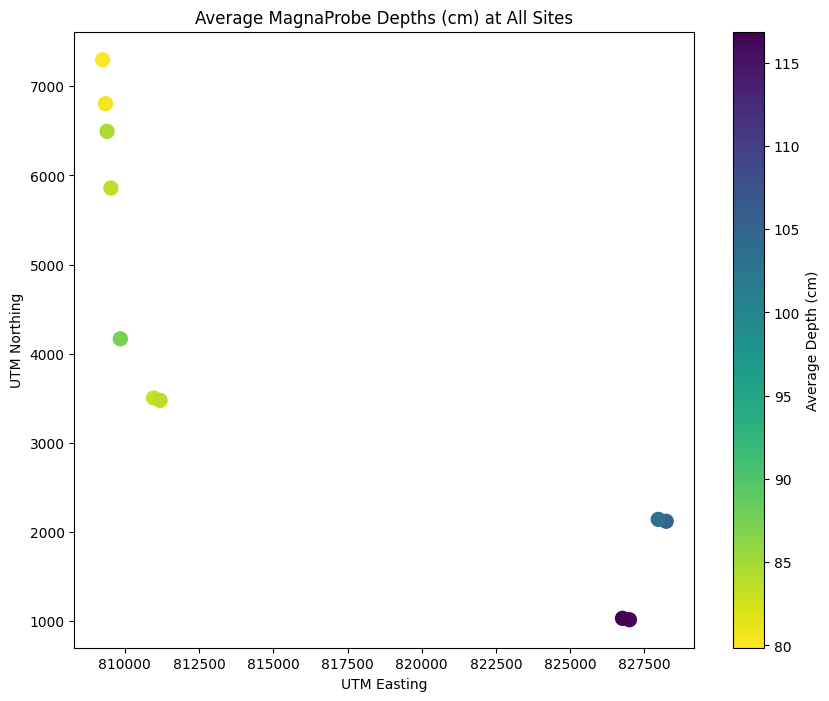

In [9]:
# Define directory paths
input_dir = '/Users/maia/GM2024/Depths/MP_CSV'
output_dir = '/Users/maia/GM2024/Depths/MP_Plots'

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Iterate over each .csv file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(input_dir, filename))

        # Filter depths between 1 and 130 centimeters
        df = df[(df['DepthCm'] >= 1) & (df['DepthCm'] <= 130)]
        
        # Convert latitude and longitude to UTM coordinates
        utm_coords = df.apply(lambda row: utm.from_latlon(row['LatitudeDDDDD'], row['LongitudeDDDDD']), axis=1)
        df['UTM_Easting'] = [coord[0] for coord in utm_coords]
        df['UTM_Northing'] = [coord[1] for coord in utm_coords]

        # averages
        avg_easting = df['UTM_Easting'].mean()
        avg_northing = df['UTM_Northing'].mean()
        avg_depth = df['DepthCm'].mean()
        
        # Create a DataFrame to store the site information
        site_data = pd.DataFrame({
            'UTM_Easting': [avg_easting],
            'UTM_Northing': [avg_northing],
            'Average_Depth': [avg_depth]
        })
        
        # Append the site data to the all_data DataFrame
        all_data = pd.concat([all_data, site_data], ignore_index=True)

# Plot average depth against UTM coordinates
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=all_data['UTM_Easting'], y=all_data['UTM_Northing'], c=all_data['Average_Depth'], cmap='viridis_r', s=100)
plt.colorbar(scatter, label='Average Depth (cm)')
plt.title('Average MagnaProbe Depths (cm) at All Sites')
plt.xlabel('UTM Easting')
plt.ylabel('UTM Northing')


plt.savefig(os.path.join(output_dir, 'average_depth_utm.png'))

plt.show()


## Histograms

### Of All Data

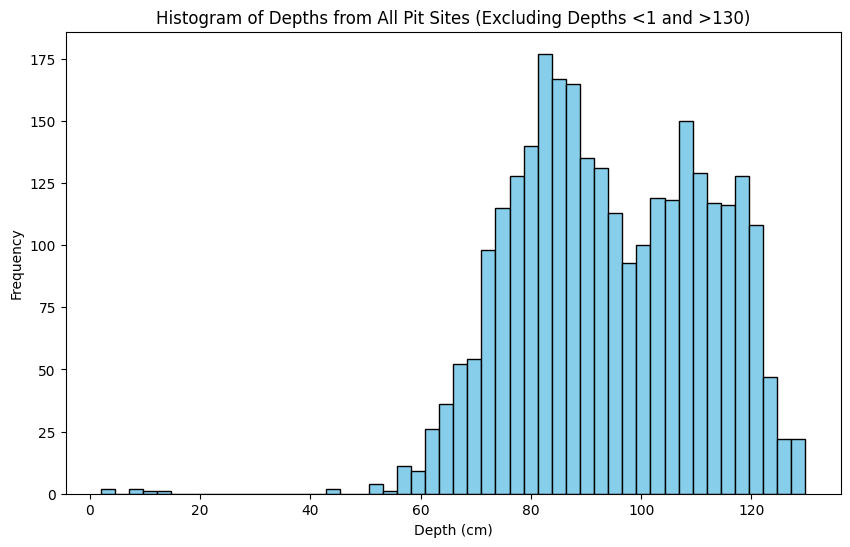

In [10]:
input_dir = '/Users/maia/GM2024/Depths/MP_CSV'
output_dir = '/Users/maia/GM2024/Depths/Histograms'

all_depths = []

for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_dir, filename))
        df['DepthCm'] = pd.to_numeric(df['DepthCm'], errors='coerce').dropna()
        all_depths.extend(df['DepthCm'].tolist())

# Filter out depth measurements less than 1 and greater than 130
filtered_depths = [depth for depth in all_depths if 1 <= depth <= 130]

# Plot histogram of filtered depths
plt.figure(figsize=(10, 6))
plt.hist(filtered_depths, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Depths from All Pit Sites (Excluding Depths <1 and >130)')
plt.xlabel('Depth (cm)')
plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('/Users/maia/GM2024/Depths/Histograms/All_Sites_histogram.png') 
plt.show()

In [11]:
print(filtered_depths)
print("Total number of depth measurements:", len(all_depths))

[74.34, 84.4, 73.1, 87.5, 82.0, 74.11, 83.8, 80.8, 86.4, 78.4, 73.66, 79.75, 84.0, 87.3, 86.1, 87.2, 90.9, 91.7, 86.9, 94.3, 86.9, 103.8, 96.7, 84.5, 77.38, 73.32, 82.8, 73.83, 74.17, 82.6, 78.23, 67.74, 73.04, 78.29, 78.06, 79.98, 76.65, 87.3, 94.4, 88.4, 84.0, 81.8, 83.2, 90.8, 88.4, 80.8, 61.75, 79.53, 82.6, 88.0, 90.3, 76.65, 60.96, 70.16, 88.6, 82.6, 85.3, 93.7, 108.1, 111.1, 112.9, 114.8, 108.5, 95.0, 102.5, 95.9, 91.3, 91.7, 88.3, 82.2, 77.67, 74.73, 60.23, 64.29, 76.76, 71.68, 56.62, 68.58, 63.62, 73.77, 70.95, 79.25, 74.84, 83.8, 82.9, 83.8, 88.7, 83.8, 87.2, 93.8, 85.8, 74.39, 68.92, 59.89, 59.61, 66.72, 72.7, 67.68, 68.02, 77.89, 82.9, 79.3, 74.96, 56.34, 56.17, 82.8, 99.5, 80.1, 73.49, 72.81, 70.78, 69.32, 71.46, 80.6, 87.9, 93.1, 101.3, 96.2, 100.3, 92.8, 79.02, 94.3, 107.6, 105.0, 101.0, 105.1, 96.2, 86.2, 89.0, 80.1, 77.1, 78.0, 82.2, 64.46, 64.12, 57.47, 67.23, 70.33, 76.59, 60.51, 68.58, 72.64, 74.34, 74.96, 76.54, 61.42, 71.57, 68.64, 71.91, 71.85, 73.21, 70.11, 69.26

### Plot by Plot

In [12]:
input_dir = '/Users/maia/GM2024/Depths/MP_CSV'
output_dir = '/Users/maia/GM2024/Depths/Histograms'

for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_dir, filename))
        df['DepthCm'] = pd.to_numeric(df['DepthCm'], errors='coerce').dropna()
        
        # Filter depths <1 and >130
        filtered_depths = df[(df['DepthCm'] >= 1) & (df['DepthCm'] <= 130)]['DepthCm']
        
        # Plot histogram of filtered depths with smaller bins
        plt.figure(figsize=(10, 6))
        plt.hist(filtered_depths, bins=50, color='skyblue', edgecolor='black')  # Adjust bins parameter
        plt.title(f'Histogram of Depths from {filename[:-24]} (Excluding Depths <1 and >130)')
        plt.xlabel('Depth (cm)')
        plt.ylabel('Frequency')
        plt.grid(True)
        
        # Save the histogram to a file
        plt.savefig(os.path.join(output_dir, f'{filename[:-4]}_histogram.png'))  # Save in the same directory with a modified filename
        
        plt.close()
        

### Statistics

Include the following
* mean
* sDev

## Trial and Error

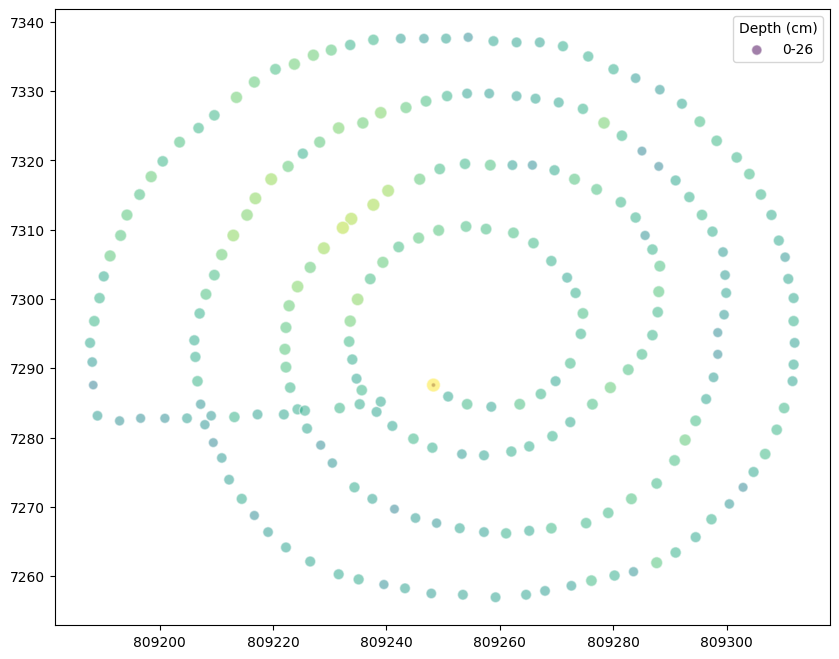

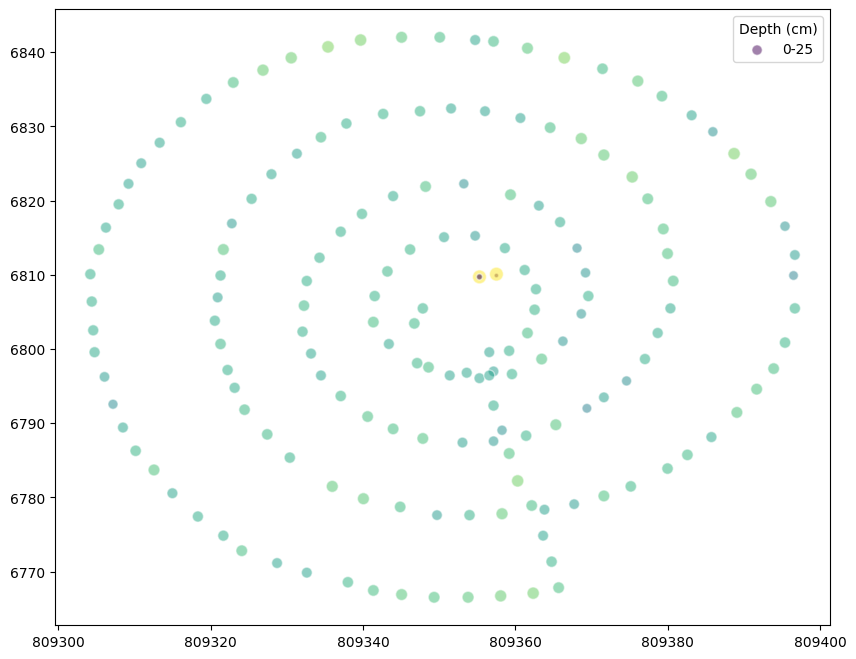

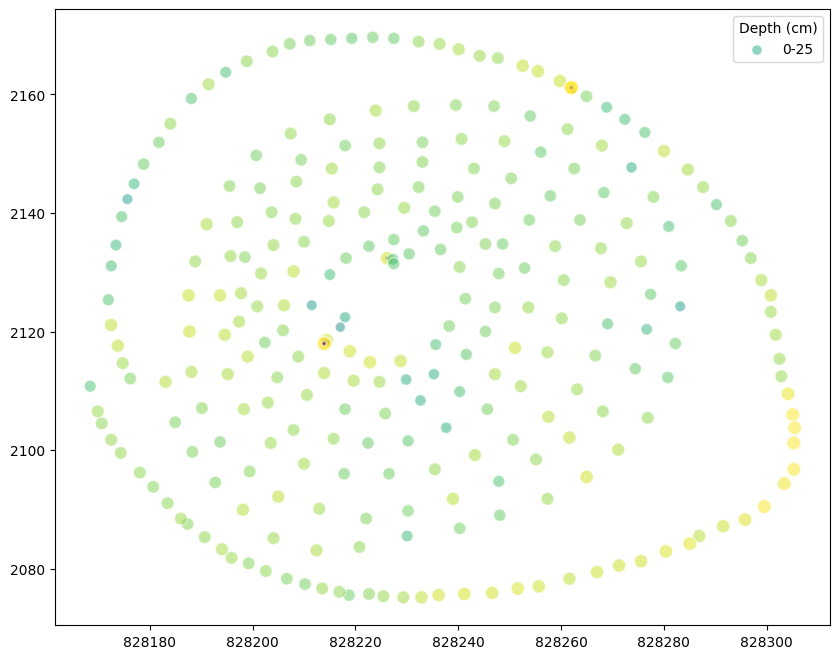

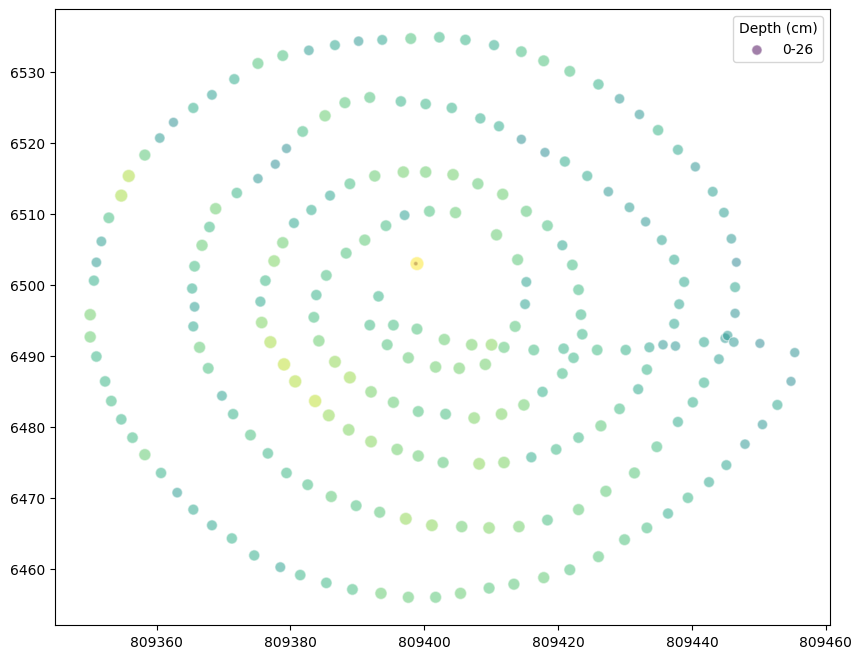

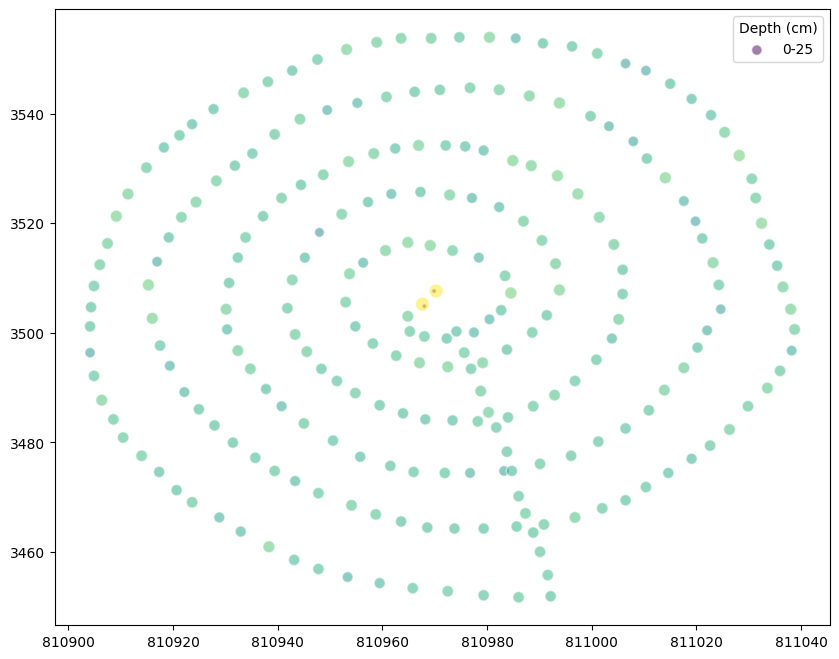

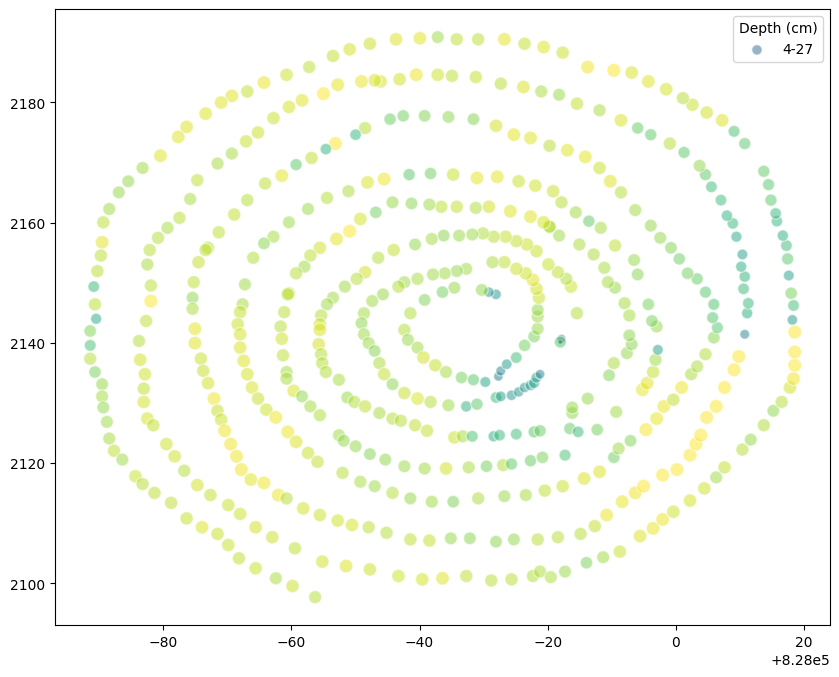

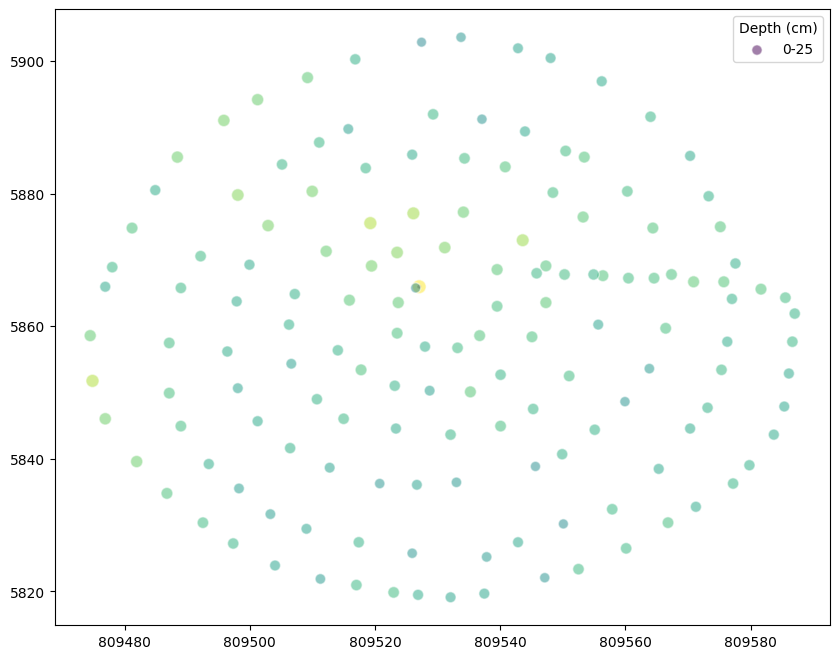

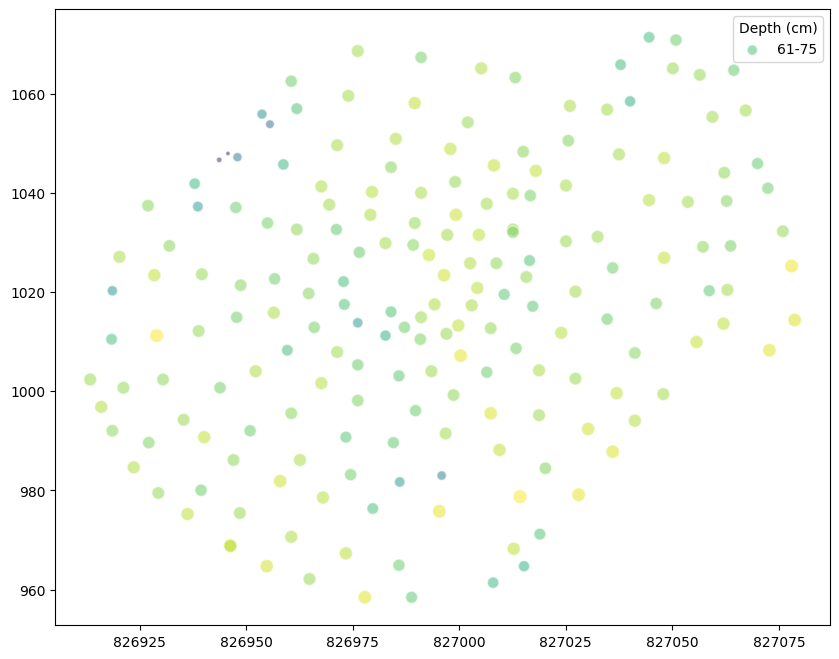

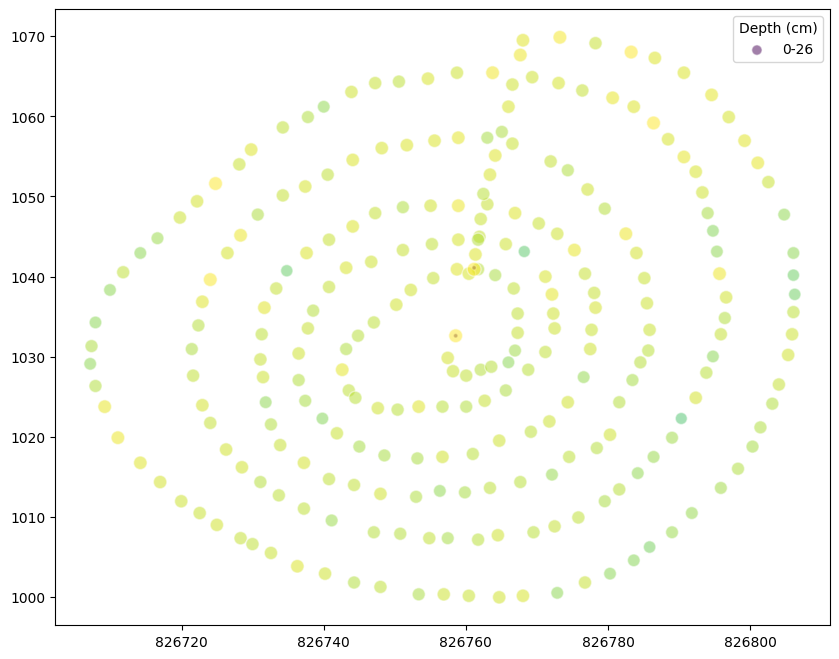

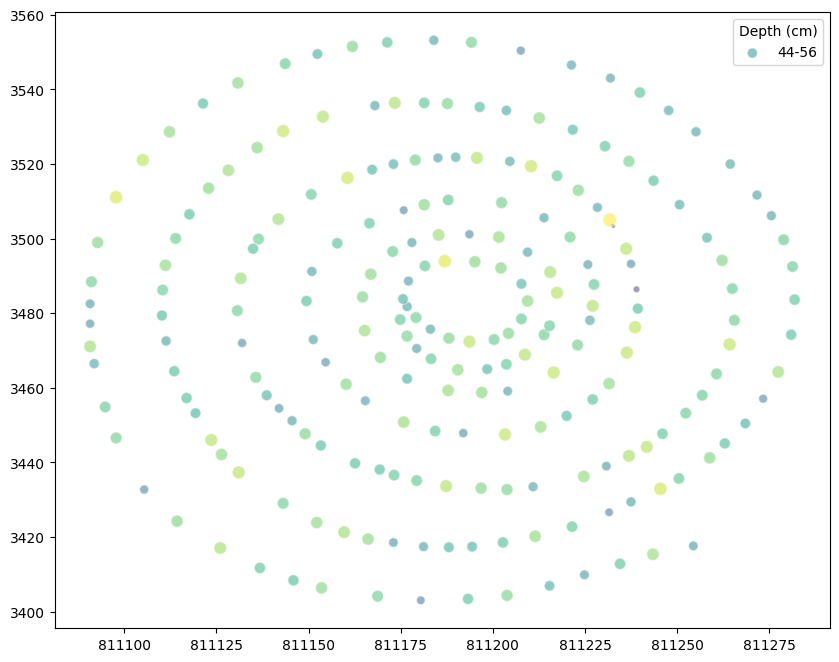

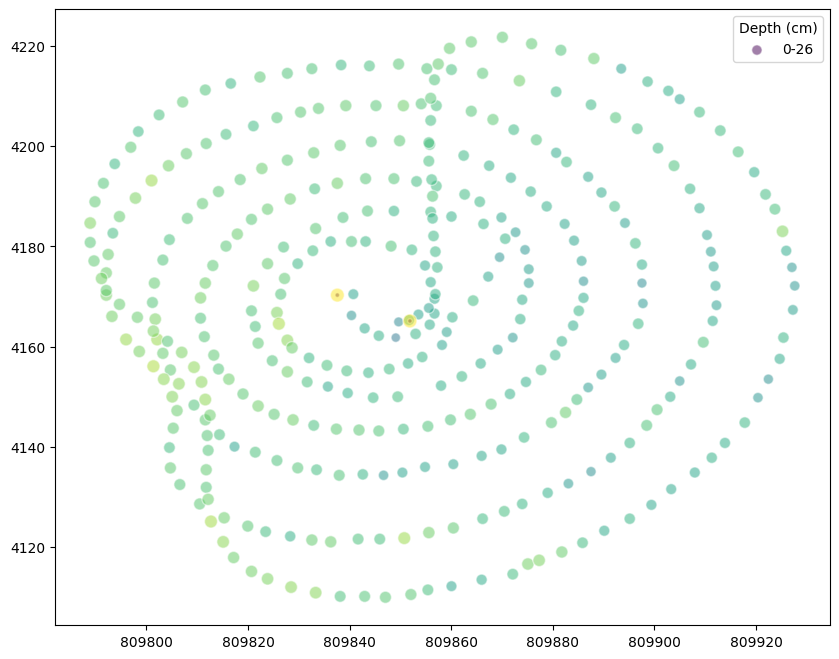

Plots generated successfully.


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import utm

# Define directory paths
input_dir = '/Users/maia/GM2024/Depths/MP_CSV'
output_dir = '/Users/maia/GM2024/Depths/MP_Plots'

# Iterate over each .csv file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(input_dir, filename))

        # Convert 'LatitudeDDDDD' and 'LongitudeDDDDD' columns to numeric type
        df['LatitudeDDDDD'] = pd.to_numeric(df['LatitudeDDDDD'], errors='coerce')
        df['LongitudeDDDDD'] = pd.to_numeric(df['LongitudeDDDDD'], errors='coerce')

        # Check if latitude and longitude values are within valid range
        valid_latitudes = df[(df['LatitudeDDDDD'] >= -80) & (df['LatitudeDDDDD'] <= 84)]
        valid_longitudes = df[(df['LongitudeDDDDD'] >= -180) & (df['LongitudeDDDDD'] <= 180)]
        if valid_latitudes.empty or valid_longitudes.empty:
            print(f"No valid latitude/longitude values in range in file: {filename}")
            continue  # Skip this file and proceed to the next one

        # Filter out rows with invalid latitude/longitude values
        df = df[(df['LatitudeDDDDD'] >= -80) & (df['LatitudeDDDDD'] <= 84)]
        df = df[(df['LongitudeDDDDD'] >= -180) & (df['LongitudeDDDDD'] <= 180)]

        # Convert latitude and longitude to UTM coordinates
        utm_coords = df.apply(lambda row: utm.from_latlon(row['LatitudeDDDDD'], row['LongitudeDDDDD']), axis=1)
        df['UTM_Easting'] = [coord[0] for coord in utm_coords]
        df['UTM_Northing'] = [coord[1] for coord in utm_coords]

        # Remove non-numeric values and convert 'DepthCm' column to numeric type
        df['DepthCm'] = pd.to_numeric(df['DepthCm'], errors='coerce').dropna()

        # Determine the range of sizes for the points
        min_size = 10  # Minimum size of the point
        max_size = 100  # Maximum size of the point

        # Map the depth values to the range of sizes
        scaled_sizes = np.interp(df['DepthCm'], (df['DepthCm'].min(), df['DepthCm'].max()), (min_size, max_size))

        # Create scatter plot
        fig, ax = plt.subplots(figsize=(10, 8))
        scatter = ax.scatter(df['UTM_Easting'], df['UTM_Northing'], c=df['DepthCm'], s=scaled_sizes, cmap='viridis', alpha=0.5, edgecolors='w')

        # Calculate depth intervals for legend
        depth_intervals = np.linspace(df['DepthCm'].min(), df['DepthCm'].max(), num=6)

        # Round depth intervals to two decimal places
        depth_intervals = np.round(depth_intervals, 2)

        # Create legend with limited depth intervals
        legend_labels = [f'{int(depth_intervals[i])}-{int(depth_intervals[i+1])}' for i in range(len(depth_intervals)-1)]
        plt.legend(legend_labels, title='Depth (cm)', loc='upper right')

        # Save the plot as an image file (PNG) with the desired filename and path
        plt.savefig(os.path.join(output_dir, f'{filename[:-4]}_UTM.png'))  # Remove the extension from filename for saved filename

        # Show the plot
        plt.show()

print("Plots generated successfully.")


In [56]:
import re

# Define the string containing the data
data_string = '2024-01-30 11:28:05.2",1075,100384,51.19,12.83,"N","3901.17401","W","10803.22321","2","34","0.5","3259.53",3.357,1,30,11,28,5,200000,"205933.20","300124","GNGGA,205933.20,3901.17401,N,10803.22321,W,2,34,0.5,3259.53,M,-17.29,M,10.4,0158*63","GNRMC,205933.20,A,3901.17401,N,10803.22321,W,1.6,333.1,300124,9.0,E,D*3A'

# Use regular expression to find the GNGGA message
gngga_match = re.search(r'GNGGA,([^,]+),([^,]+),([^,]+),([^,]+)', data_string)

if gngga_match:
    timestamp_gga = gngga_match.group(1)
    latitude_gga = gngga_match.group(2)
    latitude_direction = gngga_match.group(3)
    longitude_gga = gngga_match.group(4)

    # Convert latitude and longitude to decimal degrees
    latitude_decimal = float(latitude_gga[:2]) + float(latitude_gga[2:]) / 60
    if latitude_direction == 'S':
        latitude_decimal *= -1

    longitude_decimal = float(longitude_gga[:3]) + float(longitude_gga[3:]) / 60
    if gngga_match.group(4) == 'W':
        longitude_decimal *= -1

    print("Latitude:", latitude_decimal)
    print("Longitude:", longitude_decimal)
else:
    print("GNGGA message not found in the data string.")


Latitude: 39.019566833333336
Longitude: 108.05372016666666
